In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

%matplotlib inline

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

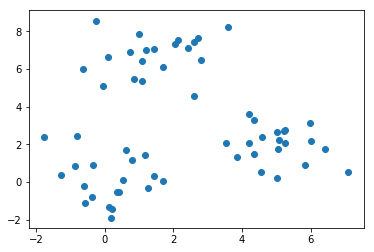

In [2]:
plt.scatter(points[:,0],points[:,1])
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [4]:
model = KMeans(3)
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = model.predict(points)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
?KMeans

In [8]:
model.cluster_centers_

array([[1.46040561, 6.74097515],
       [0.11475221, 0.18027884],
       [5.04478927, 1.98328149]])

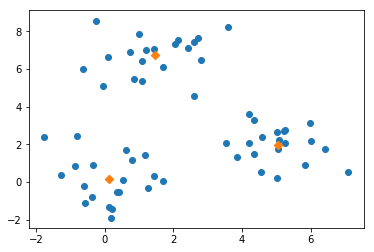

In [11]:
plt.scatter(points[:,0],points[:,1])
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],marker="D")
plt.show()

In [12]:
model.inertia_

123.81540244027073

In [14]:
model = KMeans(3, verbose=1)
model.fit(points)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 129.57741826416296
start iteration
done sorting
end inner loop
Iteration 1, inertia 123.81540244027073
start iteration
done sorting
end inner loop
Iteration 2, inertia 123.81540244027073
center shift 0.000000e+00 within tolerance 7.025854e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 123.81540244027073
start iteration
done sorting
end inner loop
Iteration 1, inertia 123.81540244027073
center shift 0.000000e+00 within tolerance 7.025854e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 129.57741826416296
start iteration
done sorting
end inner loop
Iteration 1, inertia 123.81540244027073
start iteration
done sorting
end inner loop
Iteration 2, inertia 123.81540244027073
center shift 0.000000e+00 within tolerance 7.025854e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [16]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

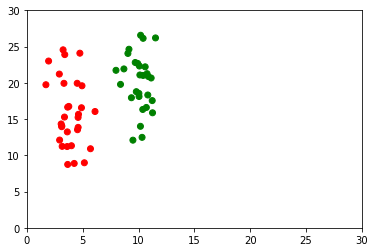

In [15]:
rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

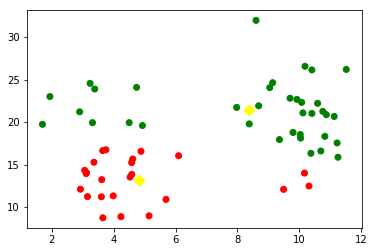

In [18]:
model = KMeans(n_clusters=2)
groups = model.fit_predict(points)

plt.scatter(points[:,0],points[:,1],
            c = np.array(["red","green"])[groups])

plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            marker="D",s=60,c="yellow")

#plt.xlim(0,30)
#plt.ylim(0,30)
plt.show()

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

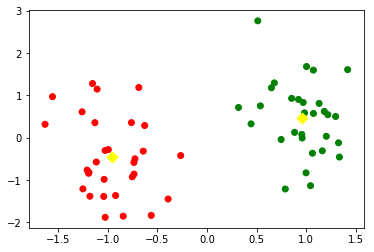

In [29]:
pipe = make_pipeline(StandardScaler(),KMeans(2))

groups = pipe.fit_predict(points)

poits2 = StandardScaler().fit_transform(points)

plt.scatter(poits2[:,0],poits2[:,1],
            c = np.array(["red","green"])[groups])

plt.scatter(pipe.steps[1][1].cluster_centers_[:,0],
            pipe.steps[1][1].cluster_centers_[:,1],
            marker="D",s=60,c="yellow")
plt.show()

In [28]:
pipe.steps[1][1].cluster_centers_

array([[-0.95708052, -0.46662977],
       [ 0.95708052,  0.46662977]])

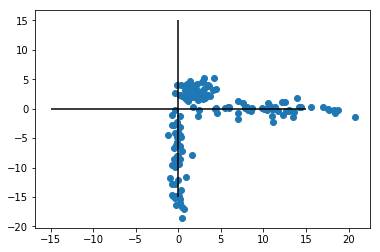

In [65]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

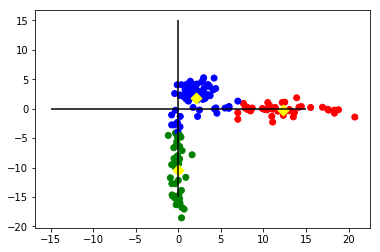

In [53]:
scale = False
scaler = StandardScaler(with_mean=scale,
                        with_std=scale)

pipe = make_pipeline(scaler,
                     KMeans(3))

groups = pipe.fit_predict(points)

poits2 = scaler.fit_transform(points)

plt.scatter(poits2[:,0],poits2[:,1],
            c = np.array(["red","green","blue"])[groups])

plt.scatter(pipe.steps[1][1].cluster_centers_[:,0],
            pipe.steps[1][1].cluster_centers_[:,1],
            marker="D",s=60,c="yellow")

p = 15
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [59]:
from sklearn.preprocessing import PowerTransformer

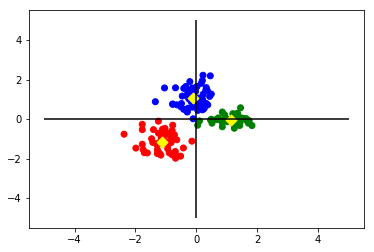

In [60]:
pipe = make_pipeline(PowerTransformer(standardize=True),
                     KMeans(3))

groups = pipe.fit_predict(points)

points3 = PowerTransformer(standardize=True).fit_transform(points)

plt.scatter(points3[:,0],points3[:,1],
            c = np.array(["red","green","blue"])[groups])

plt.scatter(pipe.steps[1][1].cluster_centers_[:,0],
            pipe.steps[1][1].cluster_centers_[:,1],
            marker="D",s=60,c="yellow")

p = 5
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [64]:
pipe.steps[0][1].lambdas_

array([0.0790369 , 1.43570526])

In [6]:
from sklearn.preprocessing import Normalizer

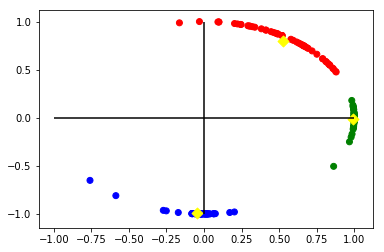

In [75]:
pipe = make_pipeline(Normalizer(),
                     KMeans(3))

groups = pipe.fit_predict(points)

points3 = Normalizer().fit_transform(points)

plt.scatter(points3[:,0],points3[:,1],
            c = np.array(["red","green","blue"])[groups])

plt.scatter(pipe.steps[1][1].cluster_centers_[:,0],
            pipe.steps[1][1].cluster_centers_[:,1],
            marker="D",s=60,c="yellow")

p = 1
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [76]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

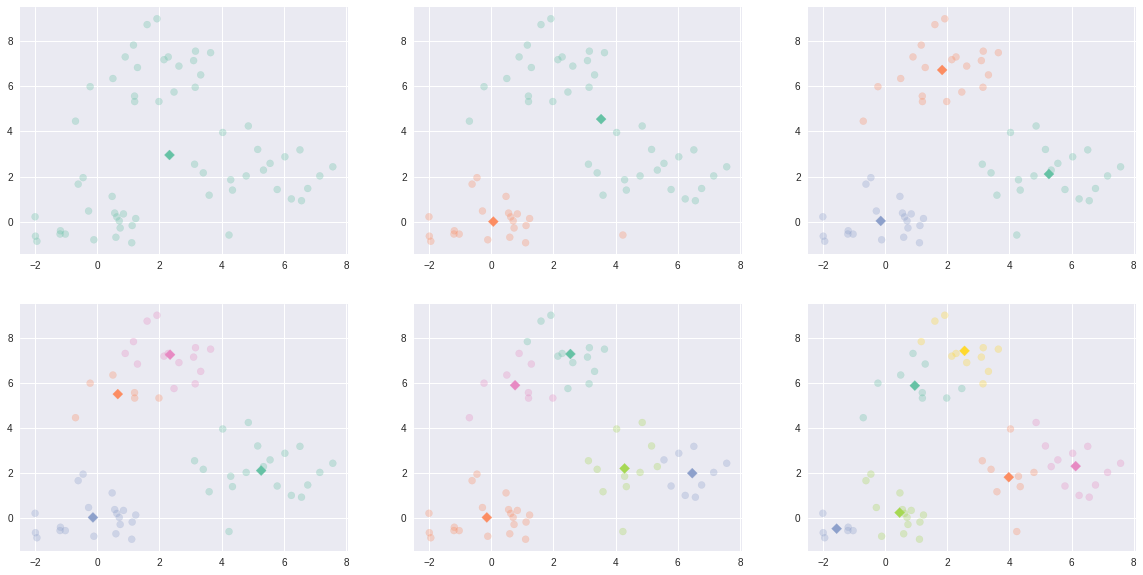

In [77]:
ks = range(1, 7)
inertias = []

plt.figure(figsize=(20,10))

for k in ks:
    
    model = KMeans(n_clusters=k)

    model.fit(points)
    labels = model.labels_
    
    inertias.append(model.inertia_)
    
    plt.subplot(2,3,k)
    plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.3)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=colors,s=50)

plt.show()

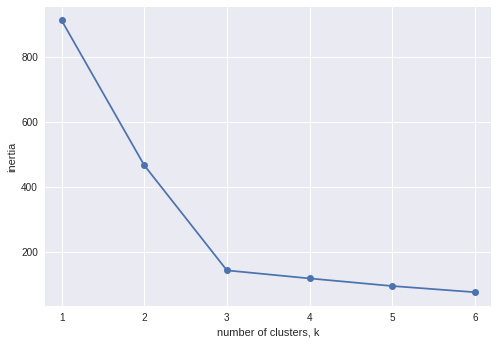

In [78]:
# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

In [79]:
from sklearn.metrics import silhouette_score

ks = range(2, 7)
silhouette = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    silhouette.append(silhouette_score(points,model.predict(points)))

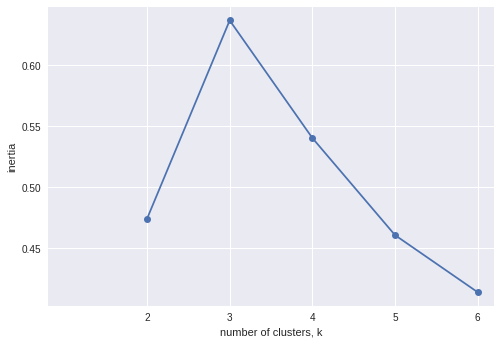

In [80]:
# Plot ks vs inertias

plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

In [4]:
data =pd.read_csv("Dane/fish.csv", sep=";",decimal=",").iloc[:,:-1]

In [83]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


Pogrupować obserwacje, wyznaczyć optymalną liczbę skupień.

In [8]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [100]:
?pipe.fit_transform

In [98]:
ks = range(2, 20)
inertias = []
silhouette = []

for k in ks:
    
    model = KMeans(n_clusters=k, n_init=3)
    model.fit(data)
    labels = model.labels_
    
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(data,labels))

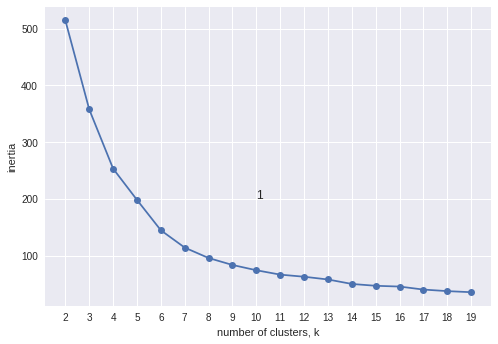

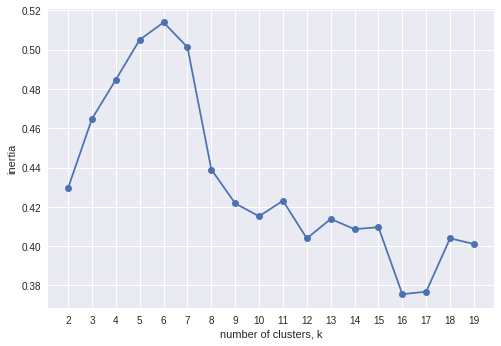

In [105]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()

In [9]:
from sklearn.decomposition import PCA

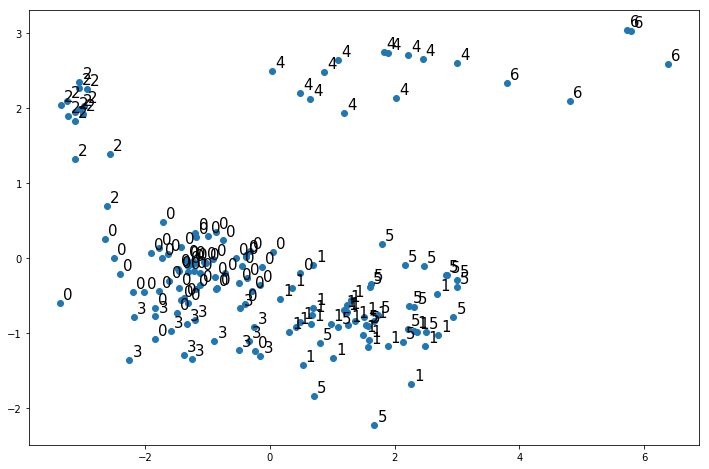

In [25]:
model = KMeans(7)
model.fit(data)
labels = model.labels_

pca = PCA(2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(12,8))
plt.scatter(data_pca[:,0],data_pca[:,1])

for i in range(data.shape[0]):
    plt.annotate(labels[i],data_pca[i],0.05+data_pca[i],size=15)

plt.show()

In [27]:
y = pd.read_csv("Dane/fish.csv", sep=";",decimal=",").Species

In [29]:
import pandas as pd

In [30]:
pd.crosstab(y, labels)

col_0,0,1,2,3,4,5,6
Species,,,,,,,
1,0,31,0,3,0,0,0
2,3,0,0,0,0,3,0
3,20,0,0,0,0,0,0
4,0,0,0,11,0,0,0
5,0,0,14,0,0,0,0
6,0,0,0,0,12,0,5
7,37,0,0,0,0,19,0


In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

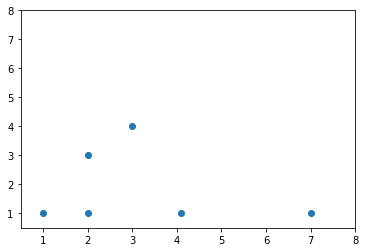

In [32]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

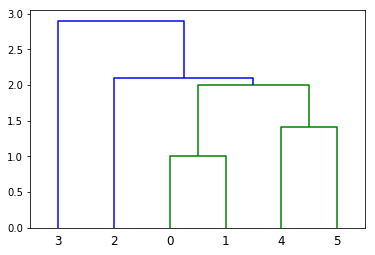

In [33]:
d = linkage(dane)
dendrogram(d)
plt.show()

In [34]:
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 7.        , 2.        , 4.        ],
       [2.        , 8.        , 2.1       , 5.        ],
       [3.        , 9.        , 2.9       , 6.        ]])

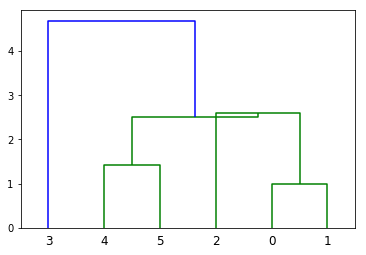

In [37]:
d = linkage(dane,"centroid")
dendrogram(d)
plt.show()

In [38]:
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [2.        , 6.        , 2.6       , 3.        ],
       [7.        , 8.        , 2.50355303, 5.        ],
       [3.        , 9.        , 4.68789932, 6.        ]])

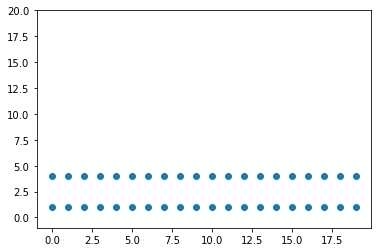

In [41]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

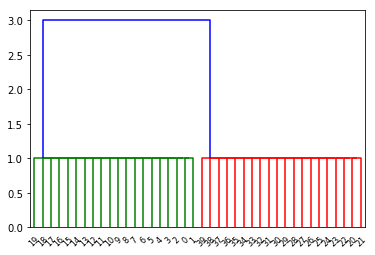

In [42]:
d = linkage(x,"single")
dendrogram(d)
plt.show()

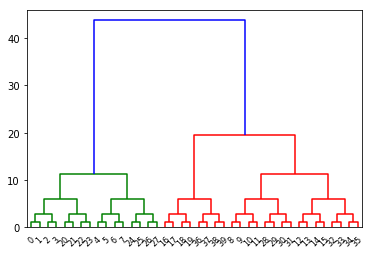

In [44]:
d = linkage(x,"ward")
dendrogram(d)
plt.show()

In [45]:
from scipy.cluster.hierarchy import fcluster

In [47]:
fcluster(d,15,criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2], dtype=int32)

In [48]:
?fcluster

In [49]:
fcluster(d,4,criterion="maxclust")

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2], dtype=int32)

In [50]:
?fcluster

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
?AgglomerativeClustering

In [60]:
from scipy.io import loadmat
dane = loadmat("Dane/eu_song_2014.mat")["x"][0][0][0]
k1 = loadmat("Dane/eu_song_2014.mat")["x"][0][0][1][0][0]
k2 = loadmat("Dane/eu_song_2014.mat")["x"][0][0][5]
dane = pd.DataFrame(dane,columns=k2)
dane.set_index(k1,inplace=True)
dane#.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0
Belgium,4,0,0,0,0,5,0,0,0,0,...,0,3,2,0,7,0,6,8,0,1
Denmark,1,0,0,5,6,0,2,0,0,0,...,0,4,0,0,3,0,0,10,0,7
Estonia,8,0,0,0,3,0,5,0,0,0,...,0,6,2,0,7,0,0,12,0,0
Finland,0,0,0,0,0,4,8,12,5,0,...,1,0,0,0,10,0,0,7,0,0
France,2,0,0,0,7,0,4,0,0,0,...,0,0,0,0,5,3,6,8,0,0


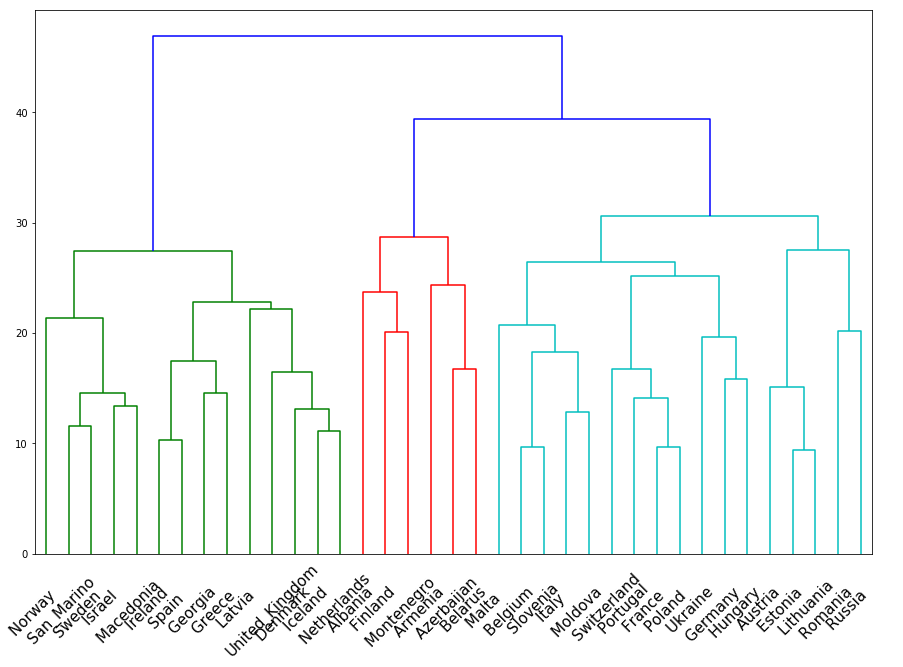

In [58]:

d = linkage(dane,"ward")
plt.figure(figsize=(15,10))
dendrogram(d, 
           labels = dane.index, 
           leaf_rotation=45,
           leaf_font_size=15)
plt.show()

In [34]:
dane_full = pd.read_csv("Dane/summer-travel-gps-full.csv")
dane_full.head(100)

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
5,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom
6,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom
7,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
8,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal
9,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal


In [10]:
dane = pd.read_csv("Dane/summer-travel-gps-full.csv").iloc[:,:2].iloc[:,::-1]
dane.head()

,lon,lat
0,-0.451011,51.481292
1,-0.450999,51.474005
2,-0.446081,51.478199
3,-0.446081,51.478199
4,-0.451562,51.474146


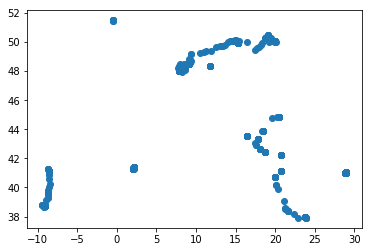

In [11]:
plt.scatter(dane.iloc[:,0],dane.iloc[:,1])
plt.show()

In [6]:
from sklearn.cluster import DBSCAN

In [21]:
model = DBSCAN(0.2,30)
model.fit(dane)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=None, p=None)

In [22]:
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([209, 173,  74, 646,  89,  98, 140,  54,  51,  30,  34,  67,  94]))

In [36]:
dane_full.city.groupby(model.labels_).agg(lambda x:x.value_counts().index[0]).iloc[1:]

0        Lisbon
1         Porto
2     Barcelona
3        Krakow
4        Prague
5      Tübingen
6      Freiburg
7         Kotor
8       Prizren
9         Ohrid
10       Athens
11     Istanbul
Name: city, dtype: object

In [37]:
dane_full.iloc[:,:2].groupby(model.labels_).mean().iloc[1:]

,lat,lon
0,38.721166,-9.164221
1,41.144187,-8.613797
2,41.381009,2.156992
3,50.059008,19.931988
4,50.077551,14.443520
5,48.528882,9.062216
6,47.991538,7.864605
7,42.423492,18.771581
8,42.208403,20.737659
9,41.114182,20.798097


In [38]:
from sklearn.cluster import Birch

In [39]:
?Birch

In [ ]:
Birch(1,3,n_clusters=AgglomerativeClustering(3,...))